In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('2018Floor3_features_selected.csv')

In [3]:
df.head()

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux)
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0


In [4]:
features=list(df.columns)
features

['z1_AC2(kW)',
 'z1_AC4(kW)',
 'z1_Plug(kW)',
 'z1_S1(RH%)',
 'z1_S1(lux)',
 'z2_AC1(kW)',
 'z2_Light(kW)',
 'z2_Plug(kW)',
 'z2_S1(RH%)',
 'z2_S1(lux)',
 'z3_Light(kW)',
 'z3_Plug(kW)',
 'z4_AC1(kW)',
 'z4_Light(kW)',
 'z4_Plug(kW)',
 'z4_S1(RH%)',
 'z4_S1(lux)',
 'z5_AC1(kW)',
 'z5_Light(kW)',
 'z5_Plug(kW)',
 'z5_S1(RH%)',
 'z5_S1(lux)']

In [5]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Train Isolation Forest model
model_iforest = IsolationForest(
    n_estimators=100, 
    contamination=0.01, 
    random_state=42
)
outlier_predictions = model_iforest.fit_predict(df_scaled)

# Add predictions to the original DataFrame
df['abnormal_iforest'] = (outlier_predictions == -1).astype(int)  # Mark outliers as 1

In [6]:

# Apply PCA to reduce the dimensions to two principal components
pca = PCA(n_components=2)  # Create PCA model
df_pca = pca.fit_transform(df_scaled)  # Transform the scaled data to 2D

# Extract the values for the first principal component
component_1 = df_pca[:, 0]  # Get the values for the first principal component

# Print the first few values of the first principal component (optional)
print("Sample values of Principal Component 1:", component_1[:5])



Sample values of Principal Component 1: [-1.3421698  -1.35189264 -1.35219068 -1.34393747 -1.34994192]


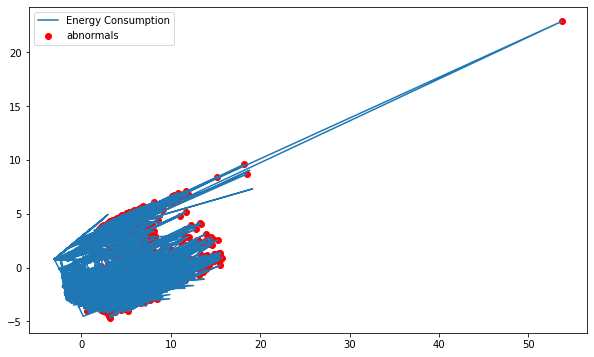

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df_pca[:,0], df_pca[:,1], label='Energy Consumption')
plt.scatter(df_pca[:,0][df['abnormal_iforest'] == 1],df_pca[:,1][df['abnormal_iforest'] == 1], color='red', label='abnormals')
plt.legend()
plt.show()

C:\Users\nadaa\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


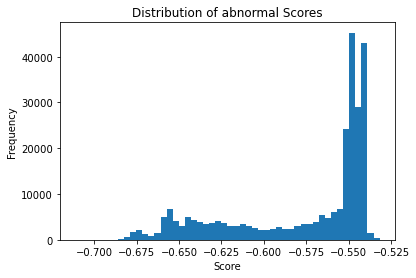

In [8]:
scores = model_iforest.score_samples(df[features])
plt.hist(scores, bins=50)
plt.title("Distribution of abnormal Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

C:\Users\nadaa\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\nadaa\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


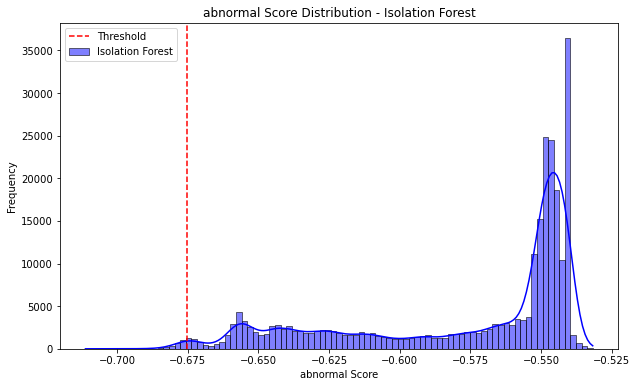

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(model_iforest.score_samples(df[features]), kde=True, color='blue', label='Isolation Forest')
plt.axvline(x=np.percentile(model_iforest.score_samples(df[features]), 1), color='red', linestyle='--', label='Threshold')
plt.title("abnormal Score Distribution - Isolation Forest")
plt.xlabel("abnormal Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [10]:
df['abnormal']=df['abnormal_iforest']
df

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux),abnormal_iforest,abnormal
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0,0,0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0,0,0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0,0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0,0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0,0
264956,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0,0
264957,0.0,0.00,0.23,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0,0
264958,0.0,0.00,0.30,0.00,0.0,0.0,0.0,0.03,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0,0


In [11]:
df.drop(['abnormal_iforest'],axis=1).to_csv('2018Floor3_abnormals_isolation_forest.csv',index=False)

In [13]:
from sklearn.pipeline import Pipeline

# Filter the dataframe to keep only the relevant features
df = df[features]
df

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux)
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0
264956,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0
264957,0.0,0.00,0.23,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0
264958,0.0,0.00,0.30,0.00,0.0,0.0,0.0,0.03,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0


In [14]:
# Create a pipeline with StandardScaler and IsolationForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('model', IsolationForest(n_estimators=100, contamination=0.01, random_state=42))  # Step 2: Train IsolationForest
])

# Apply the pipeline to the data and predict anomalies
df['abnormal_pipeline'] = pipeline.fit_predict(df)

# Convert predictions to binary: 1 for anomalies, 0 for normal
df['abnormal_pipeline'] = df['abnormal_pipeline'].apply(lambda x: 1 if x == -1 else 0)


In [15]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled) 


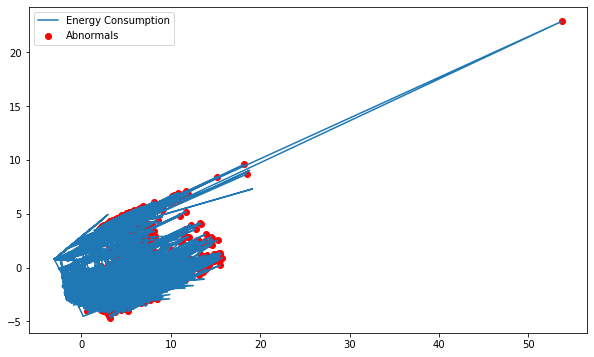

In [16]:
# Plot the data with anomalies highlighted
plt.figure(figsize=(10, 6))

# Plot the normal data points
plt.plot(df_pca[:, 0], df_pca[:, 1], label='Energy Consumption')

# Highlight anomalies in red
plt.scatter(df_pca[:, 0][df['abnormal_pipeline'] == 1], 
            df_pca[:, 1][df['abnormal_pipeline'] == 1], 
            color='red', label='Abnormals')

# Add legend and show the plot
plt.legend()
plt.show()


In [18]:
import pickle

# Save the Isolation Forest model only
with open('model_iforest.pkl', 'wb') as f:
    pickle.dump(pipeline.named_steps['model'], f)

# Save the entire pipeline including preprocessing and the model
with open('isolation_forest_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
